
# Sect 13: Central Limit Theorem

- online-ds-ft-070620
- 08/11/20


## Announcements

- Open Classroom Zoom
- Potential Group one-on-ones?

## Topics 

- Review: Normal distribution/Standard Normal Distribution
- Z-tests with Normal Distribution
- Sampling
- Central Limit Theorem
- Confidence Intervals

##  Resources for Hypothesis Testing

- **[My Hypothesis Testing Guide/Repo](https://github.com/jirvingphd/hypothesis_testing_workflow_python)** (for next class)
    - [Slideshow on Hypothesis Testing with scipy:](https://github.com/jirvingphd/hypothesis_testing_workflow_python/blob/master/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf)

## Questions

- Confidence Intervals with T Distribution readme vs lab - when to use np.std(sample, ddof=1) vs sample.std() and why do they yield different results?
- Sampling statistics lab - go over key for sample_means function 
```python
# Calculate sample mean for all combinations
    for i in range(len(combs)):
        sum = 0

        for j in range(n):
            key = combs[i][j]
            val =data[str(combs[i][j])]
            sum += val

        x_bar = sum/n
        x_bar_list.append(x_bar)
    print ("The mean of all sample means mu_x_hat is:", np.mean(x_bar_list))

    return combs, x_bar_list
```


# Review: Normal Distribution

> **The Normal Distribution is symmetrical and its mean, median and mode are equal.** 
* area under curve is equal to 1.0
* denser in the center and less dense in the tails
* defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).

> **The Standardized Normal Distribution** is a special case of the Normal Distribution where the mean is 0 and the std is 1.
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


- Special case of the normal distribution where $\mu=0$ and $\sigma=1$

In [1]:
# !pip install -U fsds
from fsds.imports import *
import scipy.stats as stats

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:xlabel='Standard Deviation Units (sigma)', ylabel='Density'>)

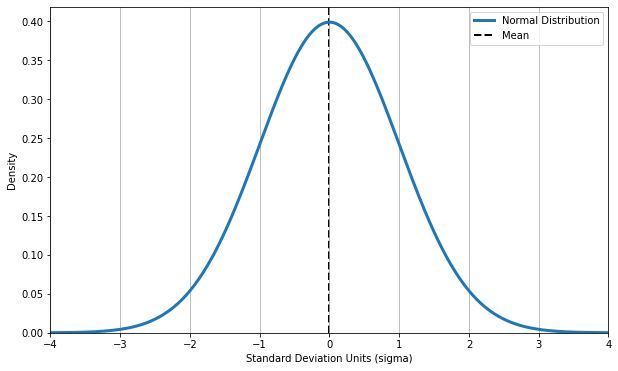

In [2]:
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax

plot_normal()

In [3]:
dfh = fs.datasets.load_height_weight()
dfh = dfh.groupby('Gender').get_group('Male')
dfh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


NormaltestResult(statistic=4.278504989483647, pvalue=0.11774282351443165)

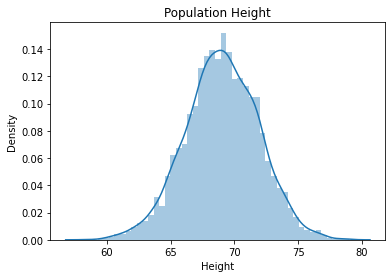

In [4]:
## Normal Population
ax = sns.distplot(dfh['Height'])
ax.set(ylabel='Density',title='Population Height')
stats.normaltest(dfh['Height'])
# dfh[['Height']].hist(bi'ns='auto',figsize=(8,5))

## Standardized Normal Distribution

### Z-Scores

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\frac{x-\mu}{\sigma}$$

- where $x$ is an individual data point
- $\mu$ is the mean
- $\sigma$ is the standard deviation

In [5]:
dfh['HeightZ'] = (dfh["Height"] - dfh['Height'].mean())/ dfh['Height'].std()

NormaltestResult(statistic=4.278504989484112, pvalue=0.11774282351440425)

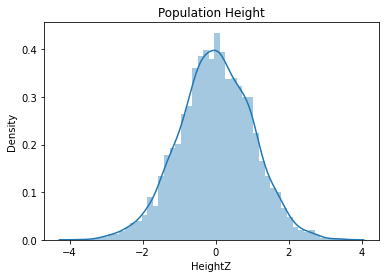

In [6]:
ax = sns.distplot(dfh['HeightZ'])
ax.set(ylabel='Density',title='Population Height')
stats.normaltest(dfh['HeightZ'])

array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'HeightZ'}>]], dtype=object)

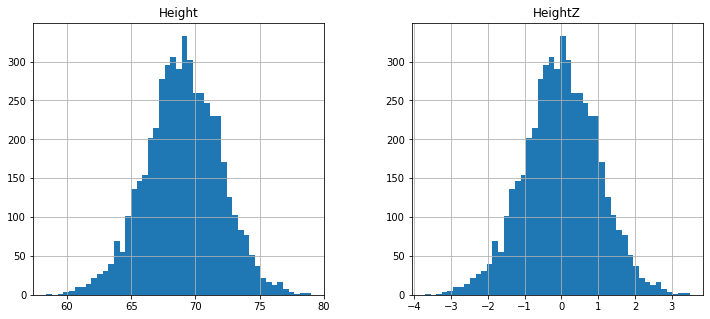

In [7]:
dfh[['Height','HeightZ']].hist(figsize=(12,5),bins='auto')

- Once data is standardized, can start answering questions about population membership using $Z$-Tests

___

# Statistical Testing with Z-scores and p-values

## Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=40%>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.



## What Are Hypotheses ?

- Null Hypothesis: $H_0$ there is no relationship / the samples come from the same population.

- Alternative: $H_A$/$H_1$ there is a relationship / the samples DO NOT come from same distribution

### One-Sample $z$-test

> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

 ### $\large \alpha$= 0.05


- What does it mean?
    - cutoff for judging whether our sample is "significantly" different than the population.
    - % chance that you would observe this sample from your population dataset







| Set     | $H_0   $    | $H_a$ | Tails |
|---------|-------|-------|-------|
|<img width=30/>|<img width=100/>|<img width=100/>|<img width=50/>|
| 1  | $\mu= M $ |$\mu \neq M $ | 2  | 
| 2  | $\mu \geq M $ |$\mu < M $ | 1  | 
| 3  | $\mu \leq M $ |$\mu > M $ | 1  | 


### Example Z-Test 

#### State our Hypothesis and Null Hypothesis

$H_0$ =  The lifeform's height comes from the human population. 

$H_1$ = The lifesform's height is significantly different than humans. (its from another population).

In [12]:
potential_alien_lifeform = 77#height

In [13]:
plt.rcParams['figure.figsize'] = (10,5)

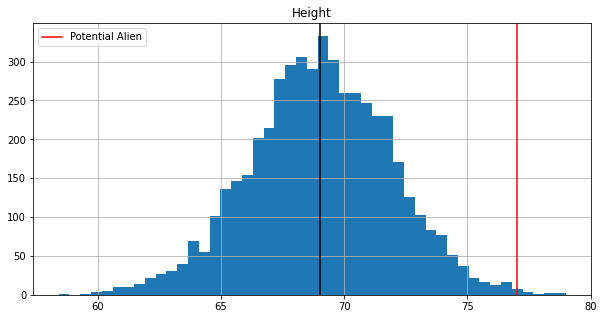

In [14]:
axes = dfh[['Height']].hist(bins='auto')
ax = axes[0][0]

meanH = dfh['Height'].mean()
stdH = dfh["Height"].std()

ax.axvline(meanH,c='k')
fig =ax.get_figure()

ax.axvline(potential_alien_lifeform,color='red',label= 'Potential Alien')
ax.legend()

In [15]:
from scipy import stats

## Use standardized normal distribution for Z-test
z_alien = (potential_alien_lifeform - meanH) /stdH
z_alien

2.7847172159955136

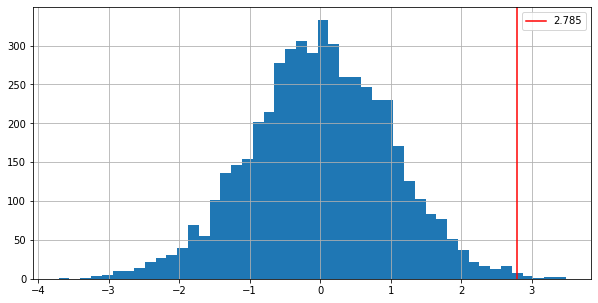

In [16]:
ax = dfh['HeightZ'].hist(bins='auto')
fig = ax.get_figure()
ax.axvline(z_alien,color='red',label=round(z_alien,3))
ax.legend()

- [Scipy.stats.norm documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [21]:
critical_value = stats.norm.ppf(.975)
critical_value

1.959963984540054

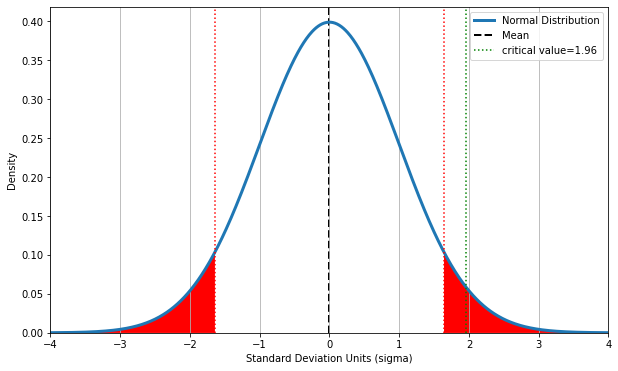

In [22]:
ax.axvline(critical_value,color='green',ls=':',
           label=f'critical value={round(critical_value,4)}')
ax.legend()
fig

In [23]:
##
p = 1 - stats.norm.cdf(z_alien)
p

0.0026787211865080263

### Confidence Intervals

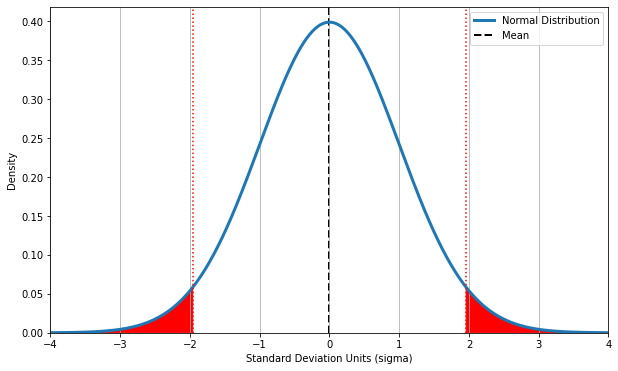

In [24]:
## Get normal dist figure
fig,ax =plot_normal(x,y)

## Critical Values (from z-table lookup)
crit_z_hi = critical_value#1.96
crit_z_low= -crit_z_hi

## Plot critical values 
crit_kws = dict(c='red',ls=':')
ax.axvline(crit_z_hi,**crit_kws)
ax.axvline(crit_z_low,**crit_kws)

# Fill tails
ax.fill_between(x,y,where=(x>crit_z_hi)|(x<crit_z_low),color='red')#&(y)


<!---For $z$-tests, a $z$-statistic is used as our test statistic. You'll see other test statistics suitable for other tests later. A one-sample $z$-statistic is calculated as:

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square root of $n$ to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". --->


# Central Limit Theorem

> "The central limit theorem states that, under many conditions, independent random variables summed together will converge to a normal distribution as the number of variables increases."
- This becomes very useful for applying statistical logic to sample statistics in order to estimate population parameters.
- The means of samples from the population will form a normal distribution, ***no matter what how a population's distribution is shaped!***


NormaltestResult(statistic=4.278504989483647, pvalue=0.11774282351443165)

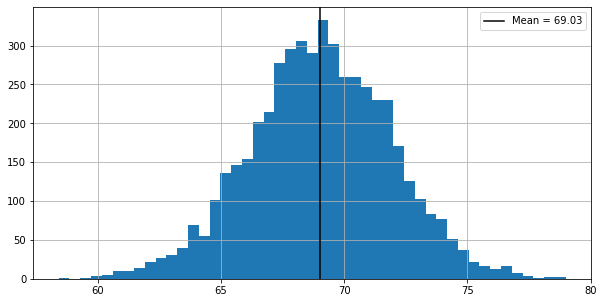

In [25]:
## Saving the Population Height
population = dfh['Height'].copy()

ax = population.hist(bins='auto')
ax.axvline(population.mean(),
           label=f'Mean = {round(population.mean(),2)}',color='k')

ax.legend()
stats.normaltest(population)

NormaltestResult(statistic=6.244574363847751, pvalue=0.04405628835178471)

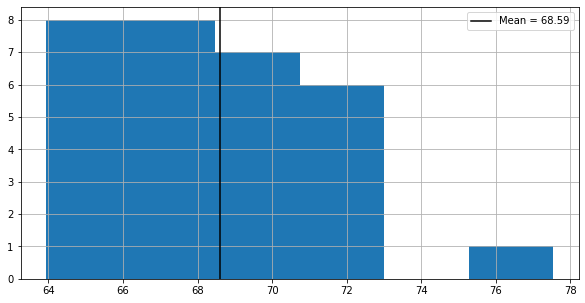

In [26]:
SAMPLE = population.sample(n=30, random_state=16)


ax = SAMPLE.hist(bins='auto')
ax.axvline(SAMPLE.mean(),label=f'Mean = {round(SAMPLE.mean(),2)}',color='k')
ax.legend()
stats.normaltest(SAMPLE)

In [29]:
# import scipy.stats as stats
def test_for_normality(x,label=None,get_p=False):
    stat,p = stats.normaltest(x)
    if p < .05:
        label_suffix = f"Not Normal: p={round(p,4)}"
    else:
        label_suffix = f"Normal: p={round(p,4)}"
    return label_suffix

In [30]:
test_for_normality(SAMPLE)

'Not Normal: p=0.0441'

### Demonstrating How Taking Many Samples Creates a Normal Distribution of Means (like in CLT Lab)

In [31]:
## CLT Lab
def get_sample(data, n):
    return data.sample(n,replace=True).values

def get_sample_mean(sample):
    return sample.mean()

def create_sample_distribution(data, dist_size=100, n=30):
    sample_means = []
    for i in range(dist_size):
        sample = get_sample(data,n)
        sample_means.append( get_sample_mean(sample))
    return sample_means

In [40]:
sample_size = 20
N_SAMPLES = 200

In [41]:
## RESAMPLE AND PLOT MEANS
## Empty lists for samples and means
samples = [] 
sample_means = []

## Get Samples & Means
for i in range(N_SAMPLES):
    sample = SAMPLE.sample(sample_size)
    samples.append(sample)
    sample_means.append(sample.mean())


'Not Normal: p=0.0441'

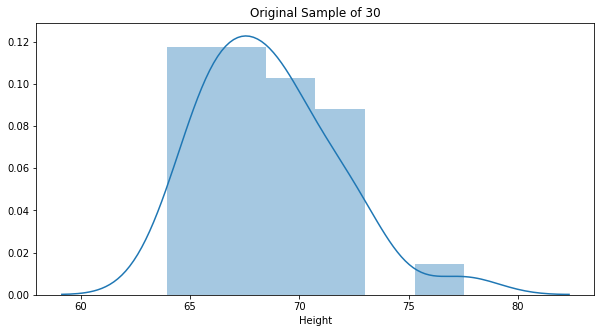

In [42]:
ax = sns.distplot(SAMPLE)
ax.set_title(f'Original Sample of {len(SAMPLE)}')
# print(stats.normaltest(SAMPLE))
test_for_normality(SAMPLE)

In [45]:
# sample_means


NormaltestResult(statistic=0.6339228148990522, pvalue=0.7283588638095201)

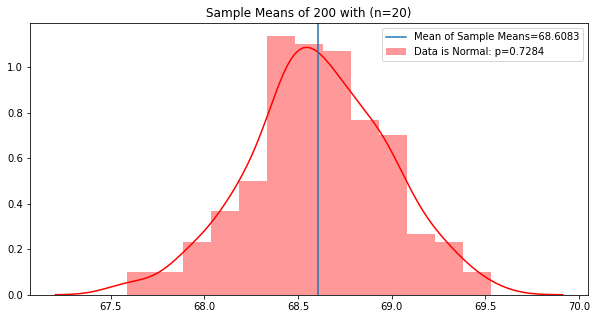

In [44]:
## Plot sample means
ax = sns.distplot(sample_means, color='red',
                  label=f"Data is {test_for_normality(sample_means)}")
ax.set_title(f"Sample Means of {N_SAMPLES} with (n={sample_size})")

final_mean = np.mean(sample_means)
ax.axvline(final_mean,label=f"Mean of Sample Means={round(final_mean,4)}")

ax.legend()
stats.normaltest(sample_means)

## The T-Distribution & T-Tests

- We usually won't know the population data, so we can modify the statistical distribution to account for this.

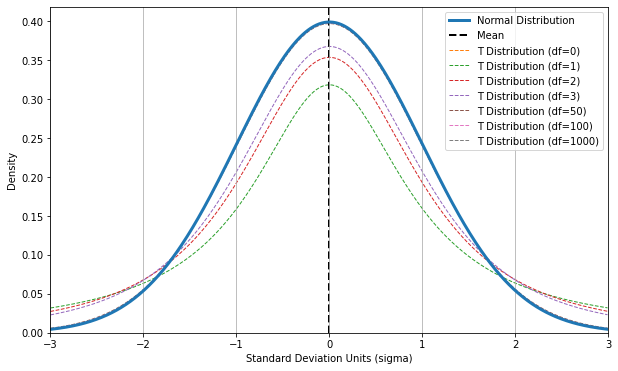

In [50]:
## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [0,1,2,3,50,100,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


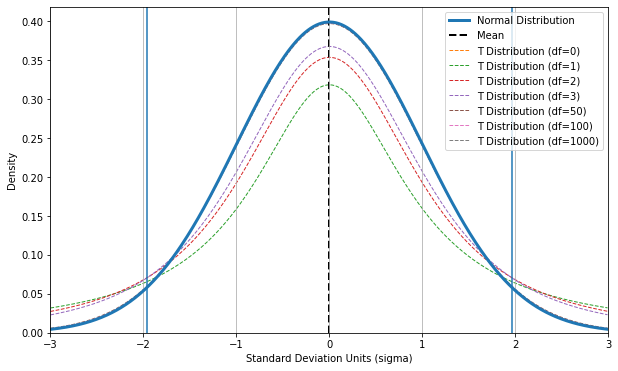

In [51]:
## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


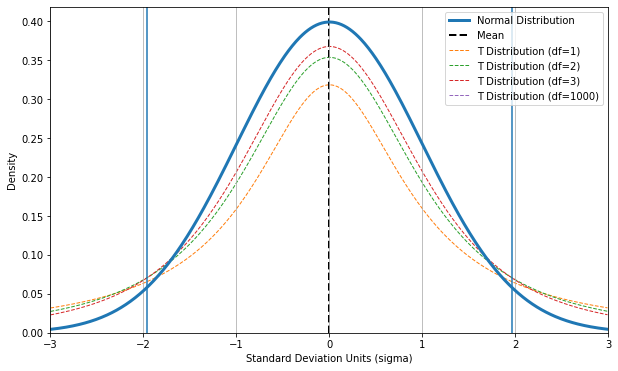

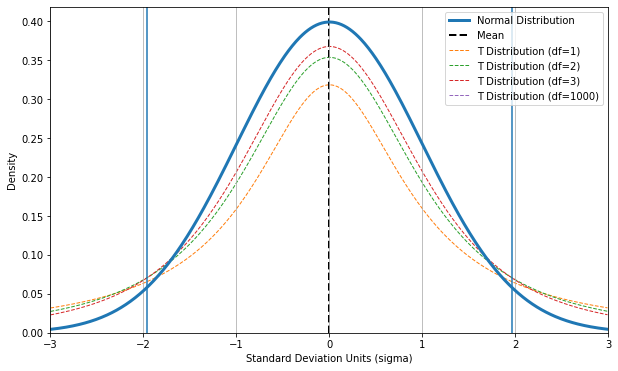

In [52]:
## The T-Distribution & T-Tests

## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [1,2,3,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


In [55]:
population.std()

2.863362228660647

In [54]:
np.std(population)

2.863075878119538